In [ ]:
"""
@author: vaaruni
"""

'\n@author: vaaruni\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load cleaned avg. marriage age and birth rate datasets
mrg_df = pd.read_json('cleanedMrgdata.json')
brate_df = pd.read_json('cleanedBirthRate.json')

In [ ]:
avg_brate = brate_df.groupby(['Country'])['Birth rate'].mean()
avg_brate = avg_brate.reset_index(name = 'Avg. Birth rate')

In [ ]:
avg_brate.describe()

,Avg. Birth rate
count,193.000000
mean,56.036277
std,46.145378
min,1.000000
25%,16.221053
50%,46.585714
75%,83.776923
max,187.460000


In [ ]:
mrg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   216 non-null    object 
 1   Avg. age  216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
# To find the missing countries in Birth rate data set
for a in list(mrg_df['Country']):
  if(a in list(avg_brate['Country'])):
    pass
  else:
    print(a)

Anguilla
Aruba
Bermuda
Cayman Islands
Channel Islands
Faeroe Islands
Falkland Islands
French Guiana
French Polynesia
Gibraltar
Greenland
Hong Kong
Isle of Man
Kosovo
Liechtenstein
Macao
Mayotte
Monaco
Montserrat
Netherlands Antilles
New Caledonia
Northern Mariana Islands
Palestine
Puerto Rico
Reunion
Sint Maarten (Dutch part)
Tokelau
Turks and Caicos Islands
United States of Virgin Islands
Wallis and Futuna


In [ ]:
#merging birth rate and marriage age dfs
brate_mrg = pd.merge(mrg_df, avg_brate, on='Country')

In [ ]:
brate_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          186 non-null    object 
 1   Avg. age         186 non-null    float64
 2   Avg. Birth rate  186 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [ ]:
#checking the maximum and minimum of the average marriage age
brate_mrg['Avg. age'].describe()


count    186.000000
mean      24.850538
std        3.790946
min       17.200001
25%       21.900000
50%       24.050000
75%       27.875000
max       33.799999
Name: Avg. age, dtype: float64

Minimum avg. marriage age is 17 and maximum avg. marriage age is 33. The mean age of marriage is 24. There seems to be no country with an average marriage age less than 16, indicating that child marriages are not the norm anywhere.

In [ ]:
#correlation matrix
corrM = brate_mrg.corr()
print(corrM)

#By descending order of average marriage age
amr_br_df=(brate_mrg[['Avg. age','Avg. Birth rate']])
print(amr_br_df.sort_values(by=['Avg. age'], ascending=False))



                 Avg. age  Avg. Birth rate
Avg. age          1.00000         -0.71595
Avg. Birth rate  -0.71595          1.00000
      Avg. age  Avg. Birth rate
159  33.799999         5.415789
155  33.200001         9.573684
48   32.500000        47.266667
74   32.400002        11.727778
46   32.400002         3.857895
..         ...              ...
100  18.799999       177.420000
31   18.799999       179.780000
12   18.799999       113.558824
30   17.299999       182.066667
118  17.200001       187.460000

[186 rows x 2 columns]


Correlation:  -0.7159496030805883


Text(0, 0.5, 'Avg. Adolescent Birth rate')

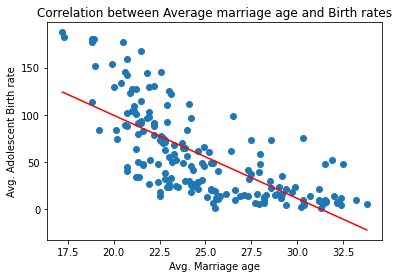

In [ ]:
x=brate_mrg['Avg. age']
y=brate_mrg['Avg. Birth rate']
correlation = y.corr(x)
print("Correlation: ",correlation)

# plotting the data
plt.scatter(x, y)
  
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# adds the title
plt.title('Correlation between Average marriage age and Birth rates')
  

# Labelling axes
plt.xlabel('Avg. Marriage age')
plt.ylabel('Avg. Adolescent Birth rate')

Negative correlation: The higher the average marriage age in a country, the lower is its average adolescent birth rate. Indicates that as people tend to marry later, adolescent births are low in a country.

Checking for any outliers:

In [ ]:
#finding the country with the highest birth rate
max_br = np.array(brate_mrg.loc[brate_mrg['Avg. Birth rate'].idxmax()])
print(max_br)


['Niger' 17.200001 187.45999999999998]


In [ ]:
#Calculating mean and standard deviation of avg. birth rate

mean = np.mean(brate_mrg['Avg. Birth rate'])
std = np.std(brate_mrg['Avg. Birth rate'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 56.58378532738859
std. deviation is 46.54197458657238


Z score for Outlier Detection: A Z score of more than 3 standard deviations indicates an outlier

In [ ]:
threshold = 3
outlier = []
for i in (brate_mrg['Avg. Birth rate']):
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


There are no outliers. 